# 책데이터 전처리
* description, kdc_class_no
## KDC 결측값
* 국립중앙도서관 API사용
* 두개의 다른 API를 거쳐 결측치 최대한 줄이려고 함
* 1차: 국립중앙도서관 소장자료 조회
* 2차: 국립중앙도서관 ISBN 서지정보 조회
* 결측치 14000 -> 3890

In [441]:
import pandas as pd
import requests
import pprint
import json
import matplotlib.pyplot as plt

In [57]:
pd.set_option('display.max_rows', 5)

In [239]:
csv_data = pd.read_csv("NL_BO_SPECIES_MASTER_NEW_202112.csv", sep = ",")

C:\Users\82104\AppData\Local\Temp\ipykernel_19420\3019416909.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_data = pd.read_csv("NL_BO_SPECIES_MASTER_NEW_202112.csv", sep = ",")


<AxesSubplot:>

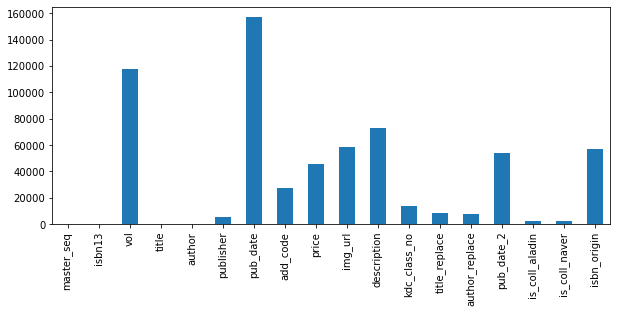

In [442]:
fig = plt.figure(figsize=(10, 4))
csv_data.isnull().sum().plot(kind='bar')

In [439]:
# cond = csv_data['kdc_class_no'].isnull()

# no_kdc_df = pd.DataFrame(csv_data[cond]).reset_index(drop=True)
# no_kdc_dfb
# yes_kdc_df = pd.DataFrame(csv_data[-cond]).reset_index(drop=True)
# yes_kdc_df

# cond2 = no_kdc_df['kdc_class_no'].isnull()

# no_kdc_df2 = pd.DataFrame(no_kdc_df[cond2]).reset_index(drop=True)
# no_kdc_df2
# yes_kdc_df2 = pd.DataFrame(no_kdc_df[-cond2]).reset_index(drop=True)
# yes_kdc_df2

In [330]:
cnt = 0
fail_cnt=0
API_KEY = '*'

for i in range(len(no_kdc_df2)):
    cnt += 1
    isbn = int(no_kdc_df2.iloc[i].isbn13)
    url = f'https://www.nl.go.kr/NL/search/openApi/search.do?key={API_KEY}&apiType=json&kwd={isbn}&pageSize=1&category=도서'
    response = requests.get(url)
    contents = json.loads(response.text)
    # print(contents, '\n')
    if contents['total'] == 1:
        no_kdc_df2.iloc[i, 11] = contents['result'][0]['classNo']
    else:
        url = f'https://www.nl.go.kr/seoji/SearchApi.do?cert_key={API_KEY}&result_style=json&page_no=1&page_size=10&isbn={isbn}'
        response = requests.get(url)
        contents = json.loads(response.text)
        if contents['TOTAL_COUNT'] == '1':
            # print(contents['docs'][0]['SUBJECT'])
            no_kdc_df2.iloc[i, 11] = contents['docs'][0]['SUBJECT']
        else:
            fail_cnt += 1
        
        
        
print(f'clear fail={fail_cnt}')

clear fail=3890


In [436]:
# no_kdc_df2.kdc_class_no.isnull().sum()

# result = pd.concat([yes_kdc_df,yes_kdc_df2,no_kdc_df2], ignore_index=True)

# result.kdc_class_no.isnull().sum()

# # result.kdc_class_no.isnull().sum()
# # result.to_csv("kdc_clear_df.csv",index=False,sep = ",")

## Description 결측값
* 카카오API사용
* 카카오책검색 API 일일 한도 30000건이라 나눠서 진행(팀원 API키값 공유해서 해결)
* 72913 -> 59092

### 1회차

In [360]:
result.description.isnull().sum()

72913

In [361]:
# cond3 = result['description'].isnull()

# no_desc_df = pd.DataFrame(result[cond3]).reset_index(drop=True)
# yes_desc_df = pd.DataFrame(result[-cond3]).reset_index(drop=True)

# no_desc_df

In [380]:
cnt = 0
fail_cnt=0
headers = {"Authorization": "KakaoAK *"}

for i in range(len(no_desc_df)):
    cnt += 1
    isbn = int(no_desc_df.iloc[i].isbn13)
    url = f'https://dapi.kakao.com/v3/search/book?&target=isbn&size=1&query=${isbn}'
    response = requests.get(url, headers=headers)
    contents = json.loads(response.text)
    if contents['meta']['total_count'] == 1:
        no_desc_df.iloc[i, 10] = contents['documents'][0]['contents']
    else:
        fail_cnt += 1
        
print(f'clear fail={fail_cnt}')

KeyError: 'meta'

In [405]:
# clear_desc_df = pd.DataFrame(no_desc_df.iloc[:29971,]).reset_index(drop=True)
# result2 = pd.concat([yes_desc_df,clear_desc_df], ignore_index=True)
# result2.to_csv("clear_desc_df.csv",index=False,sep = ",")

# # no_desc_df.iloc[29971:,]
# no_desc_df2 = pd.DataFrame(no_desc_df.iloc[29971:,]).reset_index(drop=True)
# no_desc_df2.to_csv("nonclear_desc_df.csv",index=False,sep = ",")

### 2회차

In [415]:
no_desc_df2.description.isnull().sum()

42942

In [416]:
cnt = 0
fail_cnt=0
headers = {"Authorization": "KakaoAK *"}

for i in range(len(no_desc_df2)):
    cnt += 1
    isbn = int(no_desc_df2.iloc[i].isbn13)
    url = f'https://dapi.kakao.com/v3/search/book?&target=isbn&size=1&query=${isbn}'
    response = requests.get(url, headers=headers)
    contents = json.loads(response.text)
    if contents['meta']['total_count'] == 1:
        no_desc_df2.iloc[i, 10] = contents['documents'][0]['contents']
    else:
        fail_cnt += 1
        
print(f'clear fail={fail_cnt}')

KeyError: 'meta'

In [418]:
no_desc_df2.description.isnull().sum()

39795

In [423]:
# clear_desc_df2 = pd.DataFrame(no_desc_df2.iloc[:30000,]).reset_index(drop=True)
# result2 = pd.concat([result2,clear_desc_df2], ignore_index=True)
# result2.to_csv("clear_desc_df.csv",index=False,sep = ",")

# no_desc_df3 = pd.DataFrame(no_desc_df2.iloc[30000:,]).reset_index(drop=True)
# no_desc_df3

### 3회차

In [426]:
cnt = 0
fail_cnt=0
headers = {"Authorization": "KakaoAK *"}

for i in range(len(no_desc_df3)):
    cnt += 1
    isbn = int(no_desc_df3.iloc[i].isbn13)
    url = f'https://dapi.kakao.com/v3/search/book?&target=isbn&size=1&query=${isbn}'
    response = requests.get(url, headers=headers)
    contents = json.loads(response.text)
    if contents['meta']['total_count'] == 1:
        no_desc_df3.iloc[i, 10] = contents['documents'][0]['contents']
    else:
        fail_cnt += 1
        
print(f'clear fail={fail_cnt}')

clear fail=9914


In [433]:
result2 = pd.concat([result2,no_desc_df3], ignore_index=True)
result2.to_csv("book_df.csv",index=False,sep = ",")

In [435]:
result2.description.isnull().sum()

59092

<AxesSubplot:>

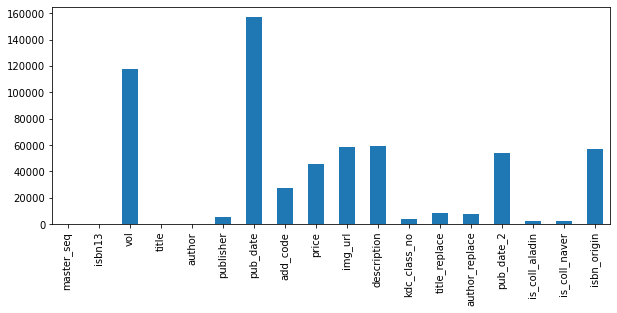

In [443]:
fig = plt.figure(figsize=(10, 4))
result2.isnull().sum().plot(kind='bar')